# Advantage sampler and Advantage sampler with clique embedding comparison for Powerlaw networks m=1, p=0.2

In [1]:
from iterative_searcher.iterative_searcher import IterativeSearcher
from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.searchers.hierarchical_community_searcher import (
    HierarchicalCommunitySearcher,
)

In [2]:
import os


dir = "exp2"
os.makedirs(os.path.dirname(dir + "/"), exist_ok=True)


def make_dir(dir):
    if not os.path.exists(dir):
        os.mkdir(dir)

In [3]:
m = 1
p = 0.2

In [5]:
dir = f"{dir}/" + f"networks/powerlaw_m={m}_p={p}"
os.makedirs(os.path.dirname(dir + "/"), exist_ok=True)

#### Generate/load graphs

In [6]:
import numpy as np


MIN_NODES = 10
MAX_NODES = 100

num_nodes = np.linspace(MIN_NODES, MAX_NODES, MAX_NODES // MIN_NODES)
num_nodes

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [7]:
import numpy as np
import networkx as nx


try:
    Graphs = np.load(f"{dir}/graphs.npy", allow_pickle=True)
except:
    Graphs = np.empty(shape=(len(num_nodes),), dtype=object)
    for i, n in enumerate(num_nodes):
        Graphs[i] = nx.powerlaw_cluster_graph(n=n, m=m, p=p)
    np.save(f"{dir}/graphs.npy", Graphs)

In [8]:
# output folder
dir = dir + "/output"
os.makedirs(os.path.dirname(dir + "/"), exist_ok=True)

## Advantage (FixedComposite with clique embedding)

In [8]:
solver = "adv-clique"
make_dir(f"{dir}/{solver}")

In [14]:
num_runs = 25

mods = np.zeros((num_nodes.shape[0], num_runs))
comms = np.empty((num_nodes.shape[0], num_runs), dtype=object)
times = np.zeros((num_nodes.shape[0], num_runs))

for i, G in enumerate(Graphs):
    adv_sampler = AdvantageSampler(G, num_reads=100, use_clique_embedding=True)
    searcher = HierarchicalCommunitySearcher(adv_sampler)
    iterative_searcher = IterativeSearcher(searcher)

    saving_path = f"{dir}/{solver}/{solver}-network_size_{G.number_of_nodes()}"
    communities, modularities, times_elapsed = iterative_searcher.run(
        num_runs=num_runs, saving_path=saving_path
    )

    try:
        comms[i] = communities
        mods[i] = modularities
        times[i] = times_elapsed
    except Exception as e:
        print(e)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)
np.save(f"{dir}/{solver}/{solver}-times", times)

 52%|█████▏    | 13/25 [49:08<37:06, 185.52s/it] Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001B41F2DD7B0>>
Traceback (most recent call last):
  File "C:\Users\basia\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
  File "C:\Users\basia\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 785, in <setcomp>
    active_threads = {thread.ident for thread in threading.enumerate()}
MemoryError: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001B41F2DD7B0>>
Traceback (most recent call last):
  File "C:\Users\basia\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for threa

Code execution interrupted in 6th iteration...

In [13]:
num_runs = 25

start_idx = 5

mods = np.zeros((num_nodes[start_idx:].shape[0], num_runs))
comms = np.empty((num_nodes[start_idx:].shape[0], num_runs), dtype=object)
times = np.zeros((num_nodes[start_idx:].shape[0], num_runs))

for i, G in enumerate(Graphs[start_idx:]):
    adv_sampler = AdvantageSampler(G, num_reads=100, use_clique_embedding=True)
    searcher = HierarchicalCommunitySearcher(adv_sampler)
    iterative_searcher = IterativeSearcher(searcher)

    saving_path = f"{dir}/{solver}/{solver}-network_size_{G.number_of_nodes()}"
    communities, modularities, times_elapsed = iterative_searcher.run(
        num_runs=num_runs, saving_path=saving_path
    )

    try:
        comms[i] = communities
        mods[i] = modularities
        times[i] = times_elapsed
    except Exception as e:
        print(e)

# np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
# np.save(f"{dir}/{solver}/{solver}-comms_final", comms)
# np.save(f"{dir}/{solver}/{solver}-times", times)

 44%|████▍     | 11/25 [1:02:42<1:11:28, 306.30s/it]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000002048D1AD7B0>>
Traceback (most recent call last):
  File "C:\Users\basia\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
  File "C:\Users\basia\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 785, in <setcomp>
    active_threads = {thread.ident for thread in threading.enumerate()}
MemoryError: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000002048D1AD7B0>>
Traceback (most recent call last):
  File "C:\Users\basia\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for th

In [16]:
import numpy as np


mods_adv_cl = np.array(
    [
        np.load(f"{dir}/adv-clique/adv-clique-network_size_{n}.npy")
        for n in range(10, 110, 10)
    ]
)
np.where(mods_adv_cl == 0)

(array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int64),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
       dtype=int64))

Code execution interrpution again. Let's rerun the last iteration.

In [12]:
num_runs = 25


G = Graphs[9]

adv_sampler = AdvantageSampler(G, num_reads=100, use_clique_embedding=True)
searcher = HierarchicalCommunitySearcher(adv_sampler)
iterative_searcher = IterativeSearcher(searcher)

saving_path = f"{dir}/{solver}/{solver}-network_size_{G.number_of_nodes()}"
communities, modularities, times_elapsed = iterative_searcher.run(
    num_runs=num_runs, saving_path=saving_path
)

100%|██████████| 25/25 [18:59<00:00, 45.56s/it]


## Advantage (EmbeddingComposite - standard embedding heuristics)

In [25]:
solver = "adv"
make_dir(f"{dir}/{solver}")

In [11]:
num_runs = 25

mods = np.zeros((num_nodes.shape[0], num_runs))
comms = np.empty((num_nodes.shape[0], num_runs), dtype=object)
times = np.zeros((num_nodes.shape[0], num_runs))

for i, G in enumerate(Graphs):
    adv_sampler = AdvantageSampler(G, num_reads=100, use_clique_embedding=False)
    searcher = HierarchicalCommunitySearcher(adv_sampler)
    iterative_searcher = IterativeSearcher(searcher)

    saving_path = f"{dir}/{solver}/{solver}-network_size_{G.number_of_nodes()}"
    communities, modularities, times_elapsed = iterative_searcher.run(
        num_runs=num_runs, saving_path=saving_path
    )

    try:
        comms[i] = communities
        mods[i] = modularities
        times[i] = times_elapsed
    except Exception as e:
        print(e)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)
np.save(f"{dir}/{solver}/{solver}-times", times)

 60%|██████    | 15/25 [1:57:56<1:23:18, 499.88s/it]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001AC8574D7B0>>
Traceback (most recent call last):
  File "C:\Users\basia\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
  File "C:\Users\basia\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 785, in <setcomp>
    active_threads = {thread.ident for thread in threading.enumerate()}
MemoryError: 
 64%|██████▍   | 16/25 [2:03:45<1:08:09, 454.42s/it]

Code execution interrupted in iteration 8. \
Let's first proceed with iterations 9 and 10:

In [9]:
num_runs = 25

start_idx = 8

mods = np.zeros((num_nodes[start_idx:].shape[0], num_runs))
comms = np.empty((num_nodes[start_idx:].shape[0], num_runs), dtype=object)
times = np.zeros((num_nodes[start_idx:].shape[0], num_runs))

for i, G in enumerate(Graphs[start_idx:]):
    adv_sampler = AdvantageSampler(G, num_reads=100, use_clique_embedding=False)
    searcher = HierarchicalCommunitySearcher(adv_sampler)
    iterative_searcher = IterativeSearcher(searcher)

    saving_path = f"{dir}/{solver}/{solver}-network_size_{G.number_of_nodes()}"
    communities, modularities, times_elapsed = iterative_searcher.run(
        num_runs=num_runs, saving_path=saving_path
    )

    try:
        comms[i] = communities
        mods[i] = modularities
        times[i] = times_elapsed
    except Exception as e:
        print(e)

100%|██████████| 25/25 [2:27:11<00:00, 353.24s/it]


And now let's rerun the interrupted iteration:

In [26]:
num_runs = 25


G = Graphs[7]

adv_sampler = AdvantageSampler(G, num_reads=100, use_clique_embedding=False)
searcher = HierarchicalCommunitySearcher(adv_sampler)
iterative_searcher = IterativeSearcher(searcher)

saving_path = f"{dir}/{solver}/{solver}-network_size_{G.number_of_nodes()}"
communities, modularities, times_elapsed = iterative_searcher.run(
    num_runs=num_runs, saving_path=saving_path
)

100%|██████████| 25/25 [44:23<00:00, 106.54s/it]


## Hierarchical Gurobi

In [15]:
solver = "gurobi"
make_dir(f"{dir}/{solver}")

In [16]:
from Qommunity.samplers.hierarchical.gurobi_sampler import GurobiSampler
from Qommunity.searchers.hierarchical_community_searcher import (
    HierarchicalCommunitySearcher,
)

In [17]:
num_runs = 25

mods = np.zeros((num_nodes.shape[0], num_runs))
comms = np.empty((num_nodes.shape[0], num_runs), dtype=object)
times = np.zeros((num_nodes.shape[0], num_runs))

for i, G in enumerate(Graphs):
    gurobi_sampler = GurobiSampler(G)
    searcher = HierarchicalCommunitySearcher(gurobi_sampler)
    iterative_searcher = IterativeSearcher(searcher)

    saving_path = f"{dir}/{solver}/{solver}-network_size_{G.number_of_nodes()}"
    communities, modularities, times_elapsed = iterative_searcher.run(
        num_runs=num_runs, saving_path=saving_path
    )

    try:
        comms[i] = communities
        mods[i] = modularities
        times[i] = times_elapsed
    except Exception as e:
        print(e)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)
np.save(f"{dir}/{solver}/{solver}-times_final", times)

100%|██████████| 25/25 [00:32<00:00,  1.29s/it]


## Leiden

In [8]:
solver = "leiden"
make_dir(f"{dir}/{solver}")

In [9]:
from Qommunity.samplers.regular.leiden_sampler import LeidenSampler
from Qommunity.searchers.community_searcher.community_searcher import CommunitySearcher

In [10]:
num_runs = 25

mods = np.zeros((num_nodes.shape[0], num_runs))
comms = np.empty((num_nodes.shape[0], num_runs), dtype=object)
times = np.zeros((num_nodes.shape[0], num_runs))

for i, G in enumerate(Graphs):
    leiden_sampler = LeidenSampler(G)
    searcher = CommunitySearcher(leiden_sampler)
    iterative_searcher = IterativeSearcher(searcher)

    saving_path = f"{dir}/{solver}/{solver}-network_size_{G.number_of_nodes()}"
    communities, modularities, times_elapsed = iterative_searcher.run(
        num_runs=num_runs, saving_path=saving_path
    )

    try:
        comms[i] = communities
        mods[i] = modularities
        times[i] = times_elapsed
    except Exception as e:
        print(e)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)
np.save(f"{dir}/{solver}/{solver}-times_final", times)

100%|██████████| 25/25 [00:00<00:00, 514.86it/s]


## Results analysis

In [9]:
import numpy as np


# Advantage runs were interrupted, so we need to combine the data from particular iterations
mods_adv = np.array(
    [np.load(f"{dir}/adv/adv-network_size_{n}.npy") for n in range(10, 110, 10)]
)
mods_adv_clique = np.array(
    [
        np.load(f"{dir}/adv-clique/adv-clique-network_size_{n}.npy")
        for n in range(10, 110, 10)
    ]
)
# We load leiden and gurobi normally below
mods_leiden = np.load(f"{dir}/leiden/leiden-mods_final.npy")
mods_gurobi = np.load(f"{dir}/gurobi/gurobi-mods_final.npy")

comms_adv = np.array(
    [
        np.load(f"{dir}/adv/adv-network_size_{n}_comms.npy", allow_pickle=True)
        for n in range(10, 110, 10)
    ]
)
comms_adv_clique = np.array(
    [
        np.load(
            f"{dir}/adv-clique/adv-clique-network_size_{n}_comms.npy", allow_pickle=True
        )
        for n in range(10, 110, 10)
    ]
)
comms_leiden = np.load(f"{dir}/leiden/leiden-comms_final.npy", allow_pickle=True)
comms_gurobi = np.load(f"{dir}/gurobi/gurobi-comms_final.npy", allow_pickle=True)

times_adv = np.array(
    [np.load(f"{dir}/adv/adv-network_size_{n}_times.npy") for n in range(10, 110, 10)]
)
times_adv_clique = np.array(
    [
        np.load(f"{dir}/adv-clique/adv-clique-network_size_{n}_times.npy")
        for n in range(10, 110, 10)
    ]
)
times_leiden = np.load(f"{dir}/leiden/leiden-times_final.npy")
times_gurobi = np.load(f"{dir}/gurobi/gurobi-times_final.npy")

## Correctness check

In [12]:
def check_saving_correctness(communities_results, modularities_results):
    for i, (comms, mods) in enumerate(zip(communities_results, modularities_results)):
        G = Graphs[i]
        for comm, mod in zip(comms, mods):
            assert nx.community.modularity(G, comm) == mod

In [14]:
check_saving_correctness(comms_adv, mods_adv)
check_saving_correctness(comms_adv_clique, mods_adv_clique)
check_saving_correctness(comms_leiden, mods_leiden)
check_saving_correctness(comms_gurobi, mods_gurobi)

## Modularity scores

In [15]:
from itertools import combinations


maxes_adv = mods_adv.max(axis=-1)
maxes_adv_clique = mods_adv_clique.max(axis=-1)
maxes_gurobi = mods_gurobi.max(axis=-1)
maxes_leiden = mods_leiden.max(axis=-1)

close_pairwise = [
    np.allclose(*pair)
    for pair in combinations(
        [maxes_adv, maxes_adv_clique, maxes_gurobi, maxes_leiden], 2
    )
]
np.all(close_pairwise)

True

#### Gurobi, Advantage with clique embedding, Leiden, Advantage

(5.0, 110.0)

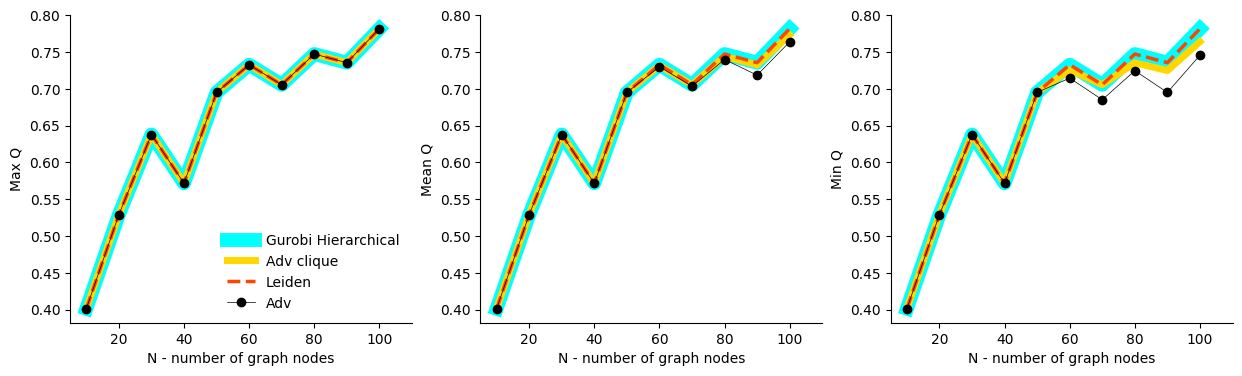

In [19]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].plot(
    num_nodes,
    mods_gurobi.max(axis=-1),
    "-",
    label="Gurobi Hierarchical",
    linewidth=10,
    color="cyan",
)
ax[0].plot(
    num_nodes,
    mods_adv_clique.max(axis=-1),
    "-",
    label="Adv clique",
    linewidth=5,
    color="gold",
)
ax[0].plot(
    num_nodes,
    mods_leiden.max(axis=-1),
    "--",
    label="Leiden",
    linewidth=2.5,
    color="orangered",
)
ax[0].plot(
    num_nodes, mods_adv.max(axis=-1), "-o", label="Adv", linewidth=0.5, color="black"
)
ax[0].legend(frameon=False)
ax[0].spines[["top", "right"]].set_visible(False)
ax[0].set_xlabel("N - number of graph nodes")
ax[0].set_ylabel("Max Q")
ax[0].set_xlim([-5 + num_nodes[0], num_nodes[-1] + 10])

ax[1].plot(num_nodes, mods_gurobi.mean(axis=-1), "-", linewidth=10, color="cyan")
ax[1].plot(num_nodes, mods_adv_clique.mean(axis=-1), "-", linewidth=5, color="gold")
ax[1].plot(num_nodes, mods_leiden.mean(axis=-1), "--", linewidth=2.5, color="orangered")
ax[1].plot(num_nodes, mods_adv.mean(axis=-1), "-o", linewidth=0.5, color="black")
ax[1].spines[["top", "right"]].set_visible(False)
ax[1].set_xlabel("N - number of graph nodes")
ax[1].set_ylabel("Mean Q")
ax[1].set_xlim([-5 + num_nodes[0], num_nodes[-1] + 10])

ax[2].plot(num_nodes, mods_gurobi.min(axis=-1), "-", linewidth=10, color="cyan")
ax[2].plot(num_nodes, mods_adv_clique.min(axis=-1), "-", linewidth=5, color="gold")
ax[2].plot(num_nodes, mods_leiden.min(axis=-1), "--", linewidth=2.5, color="orangered")
ax[2].plot(num_nodes, mods_adv.min(axis=-1), "-o", linewidth=0.5, color="black")
ax[2].spines[["top", "right"]].set_visible(False)
ax[2].set_xlabel("N - number of graph nodes")
ax[2].set_ylabel("Min Q")
ax[2].set_xlim([-5 + num_nodes[0], num_nodes[-1] + 10])

#### Advantage with clique embedding, Leiden, Advantage

(5.0, 110.0)

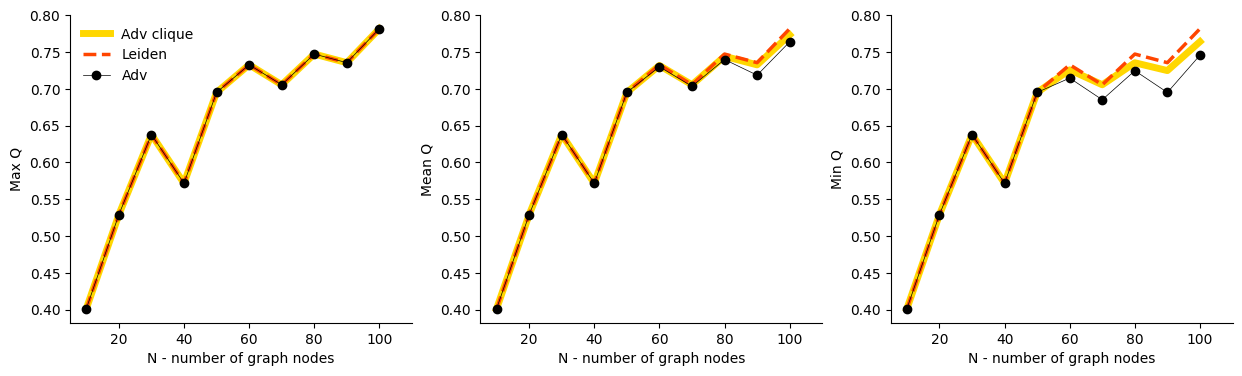

In [23]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].plot(
    num_nodes,
    mods_adv_clique.max(axis=-1),
    "-",
    label="Adv clique",
    linewidth=5,
    color="gold",
)
ax[0].plot(
    num_nodes,
    mods_leiden.max(axis=-1),
    "--",
    label="Leiden",
    linewidth=2.5,
    color="orangered",
)
ax[0].plot(
    num_nodes, mods_adv.max(axis=-1), "-o", label="Adv", linewidth=0.5, color="black"
)
ax[0].legend(frameon=False)
ax[0].spines[["top", "right"]].set_visible(False)
ax[0].set_xlabel("N - number of graph nodes")
ax[0].set_ylabel("Max Q")
ax[0].set_xlim([-5 + num_nodes[0], num_nodes[-1] + 10])

ax[1].plot(num_nodes, mods_adv_clique.mean(axis=-1), "-", linewidth=5, color="gold")
ax[1].plot(num_nodes, mods_leiden.mean(axis=-1), "--", linewidth=2.5, color="orangered")
ax[1].plot(num_nodes, mods_adv.mean(axis=-1), "-o", linewidth=0.5, color="black")
ax[1].spines[["top", "right"]].set_visible(False)
ax[1].set_xlabel("N - number of graph nodes")
ax[1].set_ylabel("Mean Q")
ax[1].set_xlim([-5 + num_nodes[0], num_nodes[-1] + 10])

ax[2].plot(num_nodes, mods_adv_clique.min(axis=-1), "-", linewidth=5, color="gold")
ax[2].plot(num_nodes, mods_leiden.min(axis=-1), "--", linewidth=2.5, color="orangered")
ax[2].plot(num_nodes, mods_adv.min(axis=-1), "-o", linewidth=0.5, color="black")
ax[2].spines[["top", "right"]].set_visible(False)
ax[2].set_xlabel("N - number of graph nodes")
ax[2].set_ylabel("Min Q")
ax[2].set_xlim([-5 + num_nodes[0], num_nodes[-1] + 10])

## Times elapsed of the hierarchical method

#### Advantage

In [24]:
time_sum_adv = np.sum(times_adv)
print(f"Time in seconds: {time_sum_adv}")
print(f"Time in hours: {time_sum_adv / 3600}")

Time in seconds: 29559.903359651566
Time in hours: 8.211084266569879


#### Advantage clique embedding

In [25]:
time_sum_clique = np.sum(times_adv_clique)
print(f"Time in seconds: {time_sum_clique}")
print(f"Time in hours: {time_sum_clique / 3600}")

Time in seconds: 24583.794699668884
Time in hours: 6.828831861019134


The overall time of Advantage with clique embedding turned out to be 2 hours shorter than of standard Advantage.

(5.0, 110.0)

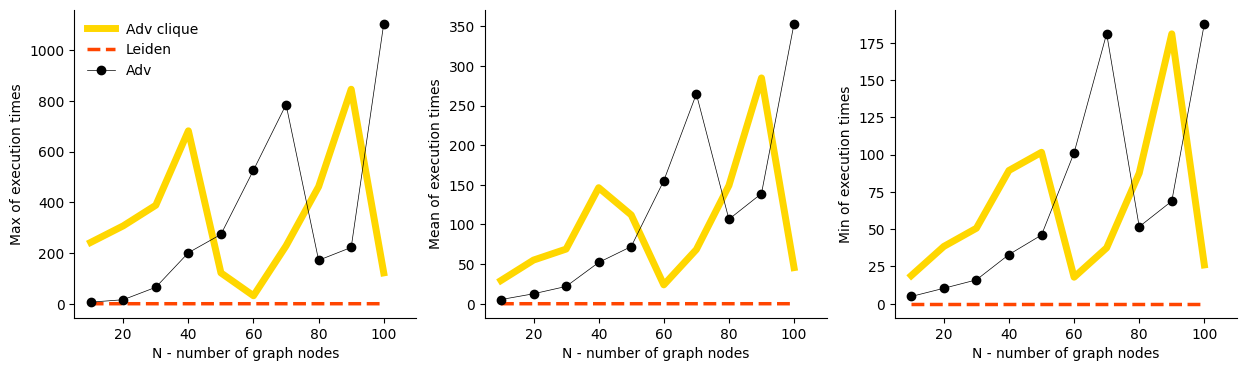

In [11]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].plot(
    num_nodes,
    times_adv_clique.max(axis=-1),
    "-",
    label="Adv clique",
    linewidth=5,
    color="gold",
)
ax[0].plot(
    num_nodes,
    times_leiden.max(axis=-1),
    "--",
    label="Leiden",
    linewidth=2.5,
    color="orangered",
)
ax[0].plot(
    num_nodes, times_adv.max(axis=-1), "-o", label="Adv", linewidth=0.5, color="black"
)
ax[0].legend(frameon=False)
ax[0].spines[["top", "right"]].set_visible(False)
ax[0].set_xlabel("N - number of graph nodes")
ax[0].set_ylabel("Max of execution times")
ax[0].set_xlim([-5 + num_nodes[0], num_nodes[-1] + 10])

ax[1].plot(
    num_nodes,
    times_adv_clique.mean(axis=-1),
    "-",
    label="Leiden",
    linewidth=5,
    color="gold",
)
ax[1].plot(
    num_nodes,
    times_leiden.mean(axis=-1),
    "--",
    label="Adv clique",
    linewidth=2.5,
    color="orangered",
)
ax[1].plot(num_nodes, times_adv.mean(axis=-1), "-o", linewidth=0.5, color="black")
ax[1].spines[["top", "right"]].set_visible(False)
ax[1].set_xlabel("N - number of graph nodes")
ax[1].set_ylabel("Mean of execution times")
ax[1].set_xlim([-5 + num_nodes[0], num_nodes[-1] + 10])

ax[2].plot(num_nodes, times_adv_clique.min(axis=-1), "-", linewidth=5, color="gold")
ax[2].plot(num_nodes, times_leiden.min(axis=-1), "--", linewidth=2.5, color="orangered")
ax[2].plot(num_nodes, times_adv.min(axis=-1), "-o", linewidth=0.5, color="black")
ax[2].spines[["top", "right"]].set_visible(False)
ax[2].set_xlabel("N - number of graph nodes")
ax[2].set_ylabel("Min of execution times")
ax[2].set_xlim([-5 + num_nodes[0], num_nodes[-1] + 10])

As can be seen, it turned out for some graphs advantage clique embedding was faster, for some the standard method.

#### Standard deviations od modularity and execution times

(5.0, 110.0)

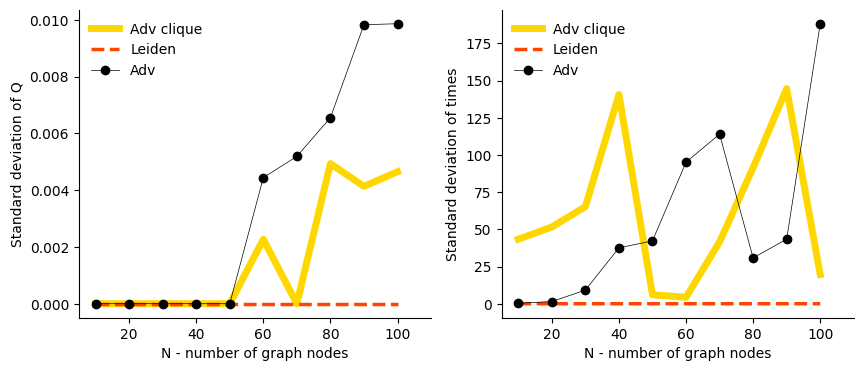

In [12]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(10, 4))

ax.plot(
    num_nodes,
    mods_adv_clique.std(axis=-1),
    "-",
    label="Adv clique",
    linewidth=5,
    color="gold",
)
ax.plot(
    num_nodes,
    mods_leiden.std(axis=-1),
    "--",
    label="Leiden",
    linewidth=2.5,
    color="orangered",
)
ax.plot(
    num_nodes, mods_adv.std(axis=-1), "-o", label="Adv", linewidth=0.5, color="black"
)
ax.legend(frameon=False)
ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("N - number of graph nodes")
ax.set_ylabel("Standard deviation of Q")
ax.set_xlim([-5 + num_nodes[0], num_nodes[-1] + 10])

ax1.plot(
    num_nodes,
    times_adv_clique.std(axis=-1),
    "-",
    label="Adv clique",
    linewidth=5,
    color="gold",
)
ax1.plot(
    num_nodes,
    times_leiden.std(axis=-1),
    "--",
    label="Leiden",
    linewidth=2.5,
    color="orangered",
)
ax1.plot(
    num_nodes, times_adv.std(axis=-1), "-o", label="Adv", linewidth=0.5, color="black"
)
ax1.legend(frameon=False)
ax1.spines[["top", "right"]].set_visible(False)
ax1.set_xlabel("N - number of graph nodes")
ax1.set_ylabel("Standard deviation of times")
ax1.set_xlim([-5 + num_nodes[0], num_nodes[-1] + 10])